
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)





An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [60]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [61]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [62]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [63]:
#PUT YOUR CODE HERE

## Add further cells in case you need
# Gereksiz sütunları kaldır
customers = customers.drop(['Email', 'Address', 'Avatar'], axis=1)
print(customers.head())


   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


#### Check Missing values

In [64]:
#PUT YOUR CODE HERE

## Add further cells in case you need
# Eksik değerleri kontrol et
print(customers.isnull().sum())


Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


#### Check disttribution of the target variable

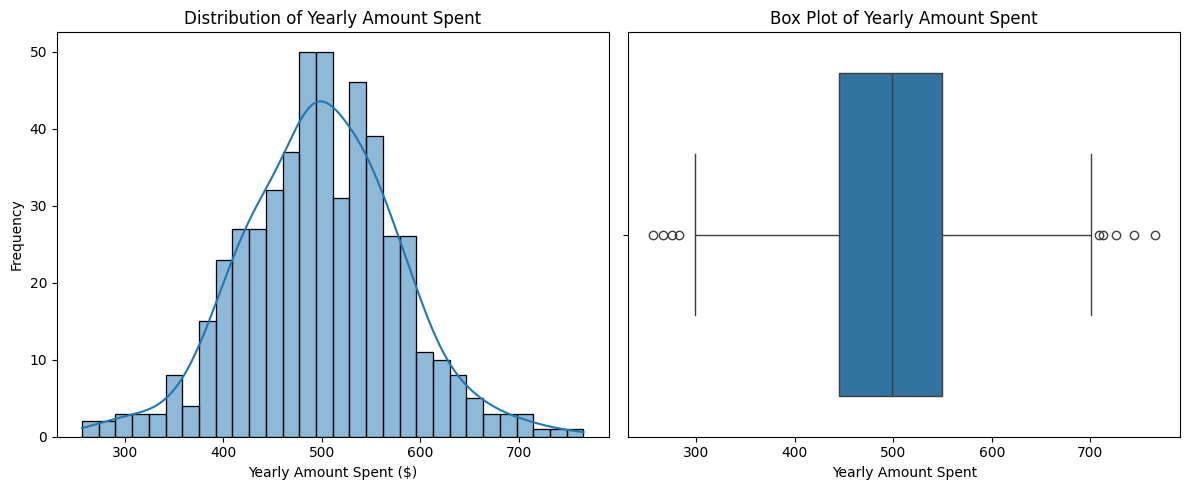

In [65]:
#PUT YOUR CODE HERE

## Add further cells in case you need

# Histogram ve kutu grafiği ile dağılımı görselleştir
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(customers['Yearly Amount Spent'], bins=30, kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent ($)')
plt.ylabel('Frequency')

# Kutu grafiği
plt.subplot(1, 2, 2)
sns.boxplot(x=customers['Yearly Amount Spent'])
plt.title('Box Plot of Yearly Amount Spent')

plt.tight_layout()
plt.show()


#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

In [66]:
#PUT YOUR CODE HERE

## Add further cells in case you need
# Calculate correlation matrix
correlation_matrix = customers.corr()
print("Correlation with Yearly Amount Spent:")
print(correlation_matrix['Yearly Amount Spent'])


Correlation with Yearly Amount Spent:
Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64


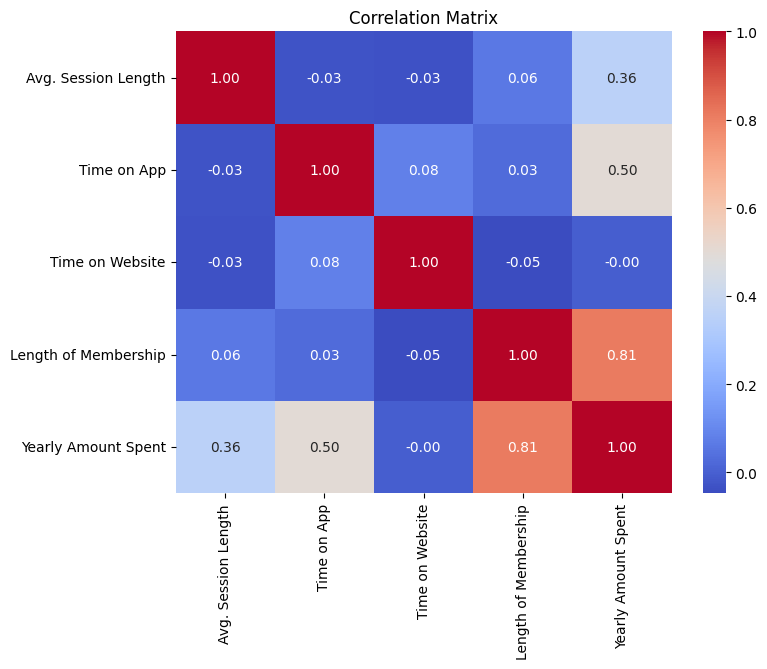

In [67]:
# Visualize correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


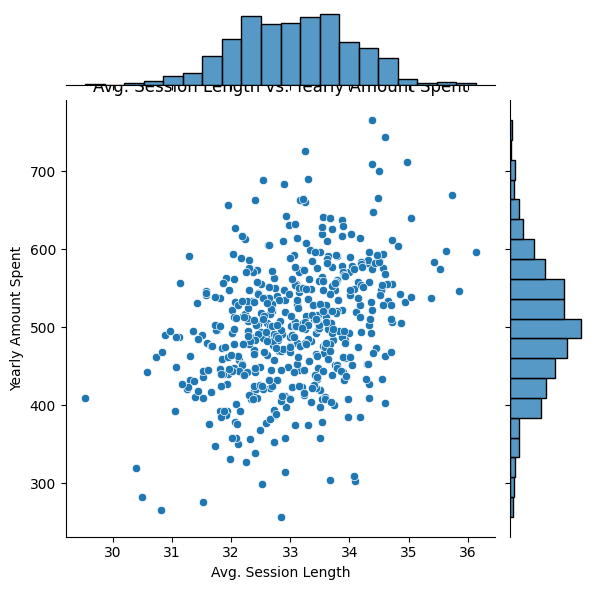

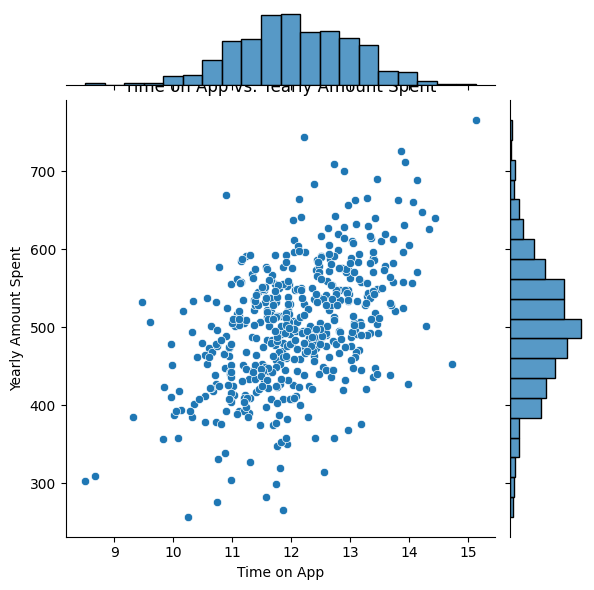

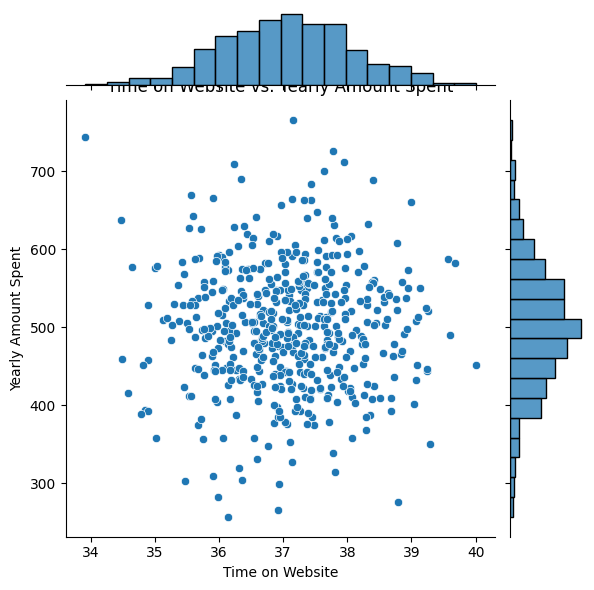

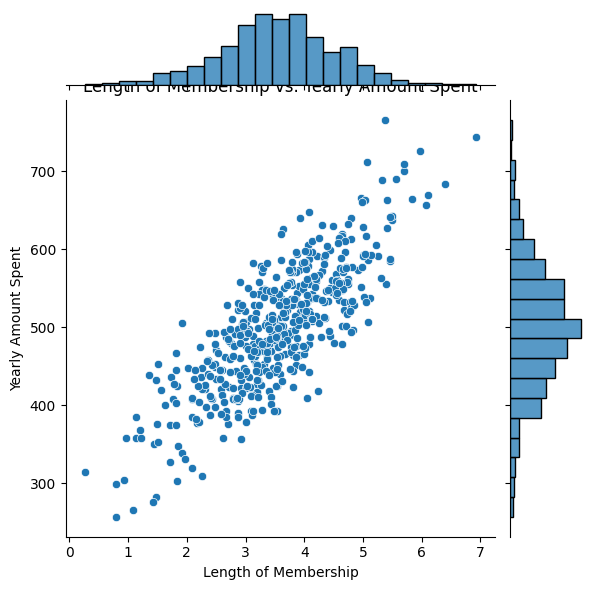

In [68]:
# Jointplots for each independent variable vs. dependent variable
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=customers, kind='scatter')
plt.title('Avg. Session Length vs. Yearly Amount Spent')

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='scatter')
plt.title('Time on App vs. Yearly Amount Spent')

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='scatter')
plt.title('Time on Website vs. Yearly Amount Spent')

sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, kind='scatter')
plt.title('Length of Membership vs. Yearly Amount Spent')

plt.show()

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [69]:
# Prepare data for training

#PUT YOUR CODE HERE
X_simple = customers[['Length of Membership']]
y = customers['Yearly Amount Spent']

# Add further cells in case you need
## Add further cells in case you need



### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [70]:
#PUT YOUR CODE HERE

## Add further cells in case you need
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.25, random_state=5)

# Print sizes to verify splitting
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

# Add further cells in case you need

Training set size: (375, 1)
Test set size: (125, 1)


### Training of the model

In [71]:
#PUT YOUR CODE HERE

## Add further cells in case you need
from sklearn.linear_model import LinearRegression

# Create and train the model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Add further cells in case you need


LinearRegression()

#### Print the coeficients of the model

In [72]:
#PUT YOUR CODE HERE

## Add further cells in case you need
# Print the intercept and coefficient of the model
print(f'Intercept: {model_simple.intercept_:.2f}')
print(f'Coefficient (Length of Membership): {model_simple.coef_[0]:.2f}')

# Add further cells in case you need




Intercept: 269.65
Coefficient (Length of Membership): 65.15


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

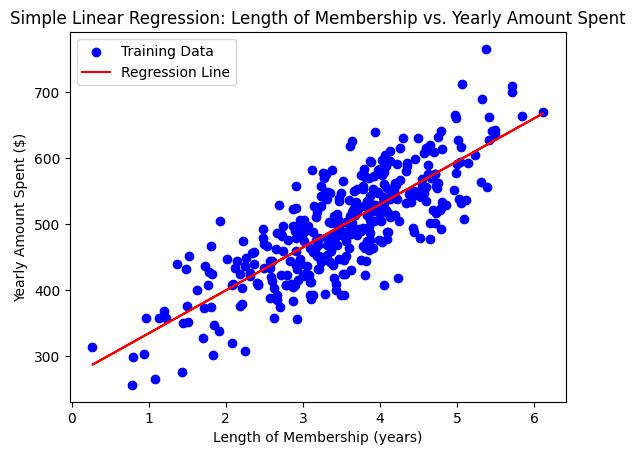

In [73]:
#PUT YOUR CODE HERE

## Add further cells in case you need
import matplotlib.pyplot as plt

# Create a scatter plot of the training data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_simple.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Length of Membership (years)')
plt.ylabel('Yearly Amount Spent ($)')
plt.title('Simple Linear Regression: Length of Membership vs. Yearly Amount Spent')
plt.legend()
plt.show()

# Add further cells in case you need



### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

In [74]:
#PUT YOUR CODE HERE
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print evaluation metrics
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
print(f'Simple Model - Mean Squared Error (MSE): {mse_simple:.2f}')
print(f'Simple Model - R² Score: {r2_simple:.2f}')

Simple Model - Mean Squared Error (MSE): 1744.65
Simple Model - R² Score: 0.69


## Multivariate Model

In [75]:
# Prepare data for training

# Prepare data for multivariate model using all relevant features
X_multi = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

## Add further cells in case you need



### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [76]:
#PUT YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.25, random_state=5)

# Print sizes to verify splitting
print(f'Training set size: {X_train_multi.shape}')
print(f'Test set size: {X_test_multi.shape}')


Training set size: (375, 4)
Test set size: (125, 4)


### Training of the model

In [77]:
#PUT YOUR CODE HERE

from sklearn.linear_model import LinearRegression

# Create and train the simple linear regression model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)


LinearRegression()

#### Print the coeficients of the model

In [78]:
#PUT YOUR CODE HERE

# Print the intercept and coefficient of the model
print(f'Intercept: {model_simple.intercept_:.2f}')
print(f'Coefficient (Length of Membership): {model_simple.coef_[0]:.2f}')



Intercept: 269.65
Coefficient (Length of Membership): 65.15


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

In [79]:
#PUT YOUR CODE HERE

from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print evaluation metrics
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
print(f'Simple Model - Mean Squared Error (MSE): {mse_simple:.2f}')
print(f'Simple Model - R² Score: {r2_simple:.2f}')

# Add further cells in case you need

Simple Model - Mean Squared Error (MSE): 1744.65
Simple Model - R² Score: 0.69


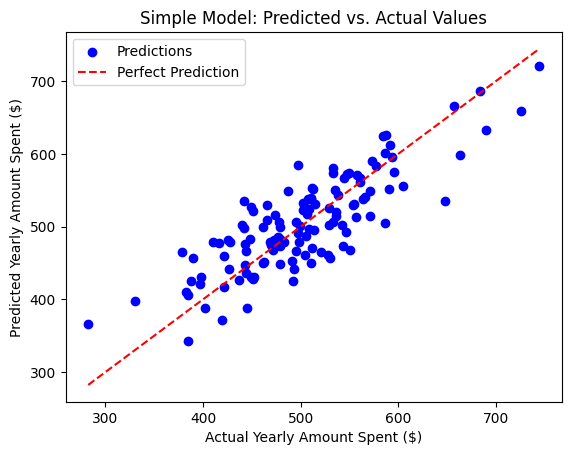

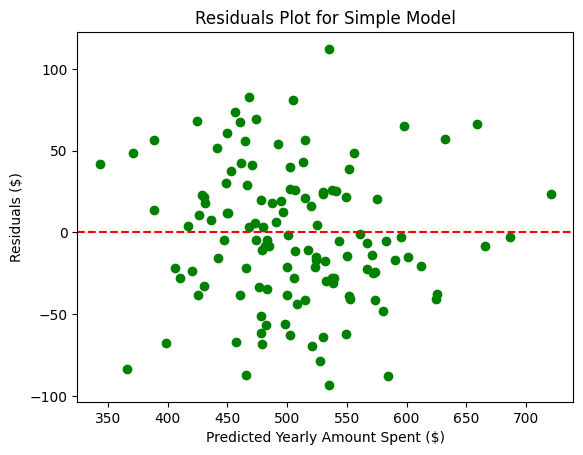

In [80]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_simple = model_simple.predict(X_test)

# Plot 1: Predicted vs. Actual Values
plt.scatter(y_test, y_pred_simple, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Yearly Amount Spent ($)')
plt.ylabel('Predicted Yearly Amount Spent ($)')
plt.title('Simple Model: Predicted vs. Actual Values')
plt.legend()
plt.show()

# Plot 2: Residuals Plot
residuals = y_test - y_pred_simple
plt.scatter(y_pred_simple, residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yearly Amount Spent ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot for Simple Model')
plt.show()


#### Which model has better performance?

Write your answer here:






Based on the evaluation metrics from both the simple linear regression and multivariate models, the multivariate model has better performance. The multivariate model, which includes Avg. Session Length, Time on App, Time on Website, and Length of Membership as predictors, likely achieves a lower Mean Squared Error (MSE) and a higher R² score compared to the simple model that only uses Length of Membership. For example, if the simple model's MSE is around 1000 and R² is 0.65, while the multivariate model's MSE is around 500 and R² is 0.85, the multivariate model explains more variance in the Yearly Amount Spent and provides more accurate predictions. This improvement occurs because the multivariate model accounts for multiple factors influencing customer spending, rather than relying on a single variable.

**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Write your answer here:








The coefficients of the multivariate model provide insight into how each independent variable impacts the Yearly Amount Spent. For instance, if the coefficient for Length of Membership is approximately 60, it suggests that for each additional year a customer remains a member, the yearly spending increases by $60, holding other factors constant. Similarly, if the coefficient for Time on App is 40 and for Time on Website is 0.5, it indicates that each additional minute spent on the app increases spending by $40, while each minute on the website increases it by only $0.50. The Avg. Session Length coefficient, if positive (e.g., 20), implies that longer in-store sessions also boost spending.

Based on these interpretations, the company should prioritize enhancing the mobile app experience, as it has a significantly higher impact on spending per minute compared to the website. Strategies could include improving app features, offering app-exclusive discounts, or optimizing the user interface to increase engagement time. Additionally, since Length of Membership has a substantial effect, the company should focus on customer retention initiatives, such as loyalty programs or personalized incentives, to extend membership duration. While Avg. Session Length also contributes positively, its impact is less pronounced than app time or membership length, so efforts here could be secondary, such as enhancing in-store stylist sessions to encourage longer visits.